# Machine Learning Fianl Project

## Goal

- Goal:

    Predict	a	person’s	“Empathy” as	either	“very	empathetic”	(answers	4	and	5)	or	“not	very	empathetic”	(answers	1,	2,	and	3)  
    
  
- Python libraries:
    - Numpy
    - Pandas
    - Sci-kit learn
    - Matplotlib

Source of Young people dataset: https://www.kaggle.com/miroslavsabo/young-people-survey/

## Agenda

1. Introducing the Data
2. Data Preprocessing
3. Model Building  SVM
<br>    3.1 Feature Selection for SVM
4. Model Building Random Forest
<br>    4.1 Feature Selection for RF

## 1. Introducing the Data

You	are working	for	a non-profit that is recruiting student	volunteers to help with Alzheimer’s	patients. You have been tasked with predicting how suitable a	person is for this task	by predicting how empathetic he	or she	is.	Using the Young People	Survey dataset , predict a person’s	“Empathy” as either “very	empathetic”	(answers	4	and	5)	or	“not	very	empathetic”	(answers 1,	2,	and	3).	You	can	use	any	of the	other attributes in	the	dataset	to	make this prediction; however, you should not handpick the predictive features but let an algorithm select them.

In [572]:
import pandas as pd
import Imputation

data =pd.read_csv("responses.csv")

In [573]:
pd.options.display.max_columns = 200
data.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


We have both numerical and categorical data.
Let's check if there are missing values in our data:

In [664]:
pd.options.display.max_rows = 30
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Music                          3
Slow songs or fast songs       2
Dance                          4
Folk                           5
Country                        5
Classical music                7
Musical                        2
Pop                            3
Rock                           6
Metal or Hardrock              3
Punk                           8
Hiphop, Rap                    4
Reggae, Ska                    7
Swing, Jazz                    6
Rock n roll                    7
                              ..
Shopping centres               2
Branded clothing               2
Entertainment spending         3
Spending on looks              3
Spending on healthy eating     2
Age                            7
Height                        20
Weight                        20
Number of siblings             6
Gender                         6
Left - right handed            3
Education                      1
Only child                     2
Village - town                 4
House - bl

## 2. Data Preprocessing

We have to convert categorical data into numerical data. For this purpose, we will apply one hot encoding. However, we have missing data in our categorical type data. If we apply one hot encoding first, we won't be able to assign anything to these missing values. For example, if gender of an example is missing, one hot enconding will assign 0 to both male and female column of that example. Therefore, we will first impute both missing numerical and categorical data using the median and most frequent class, respectively.

In [575]:
# Imputation of missing data
Z = pd.DataFrame(data)
xt = Imputation.DataFrameImputer().fit_transform(Z)

Now we will apply one hot encoding.

In [576]:
# One hot encoding
responses = pd.get_dummies(xt, columns=['Smoking', 'Alcohol','Punctuality', 'Lying', 'Internet usage', 'Gender',
                                    'Left - right handed', 'Education', 'Only child', 'Village - town',
                                    'House - block of flats'])

In [577]:
pd.options.display.max_columns = 250
responses.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Smoking_current smoker,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Punctuality_i am always on time,Punctuality_i am often early,Punctuality_i am often running late,Lying_everytime it suits me,Lying_never,Lying_only to avoid hurting someone,Lying_sometimes,Internet usage_few hours a day,Internet usage_less than an hour a day,Internet usage_most of the day,Internet usage_no time at all,Gender_female,Gender_male,Left - right handed_left handed,Left - right handed_right handed,Education_college/bachelor degree,Education_currently a primary school pupil,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1

Now, we convert the problem into binary classification by assigning 1 to the responses corresponding to 4,5 Empathy and 0 to 1,2,3 Empathy.

In [578]:
print(responses.columns.get_loc('Empathy'))

92


In [579]:
label=responses.iloc[:,[92]].values
binarizer=preprocessing.Binarizer(3)
binarizer_scaled=binarizer.fit_transform(label)
label[:] = binarizer_scaled[:]
responses['Empathy']=label[:]

Now, we do feature scaling using MinMaxScalar on columns that their range of values are significantly different than other columns, namely; Age, Height, Weight, and number of sibilings.

In [580]:
label2=responses.iloc[:,[135,136,137,138]].values
MinMaxScalar=preprocessing.MinMaxScaler()
features_scaled=MinMaxScalar.fit_transform(label2)
print(features_scaled)

[[0.33333333 0.71631206 0.05645161 0.1       ]
 [0.26666667 0.71631206 0.13709677 0.2       ]
 [0.33333333 0.80851064 0.20967742 0.2       ]
 ...
 [0.2        0.78723404 0.27419355 0.        ]
 [0.66666667 0.78723404 0.13709677 0.1       ]
 [0.4        0.87234043 0.25       0.1       ]]


In [581]:
label2[:]=features_scaled[:]
np.shape(responses[['Empathy','Age']])
responses[['Age','Height','Weight','Number of siblings']]=label2[:,:]

Now, let's split our preprocessed data into train and test data and store them in separate files.

In [582]:
#train_test_split
from sklearn.model_selection import train_test_split
X=responses.loc[:, responses.columns != 'Empathy']
Y=responses['Empathy']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [583]:
#saving train data
import pickle
with open('train(172).data', 'wb') as f:
    pickle.dump([X_train, y_train], f)

In [584]:
#saving test data
import pickle
with open('test(172).data', 'wb') as f:
    pickle.dump([X_test, y_test], f)

In [585]:
print(np.shape(X_train))
print(np.shape(X_test))

(808, 172)
(202, 172)


We have separated 808 and 202 examples as train and test data, respectively.

## 3. Model Building SVM

We will apply support vector machine classifier as our first model.

In [586]:
#SVM training
from sklearn import svm
clf=svm.SVC(gamma=0.1, C=100)
clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's check our accuracy on training data.

In [587]:
print(clf.score(X_train, y_train))

1.0


It looks like our model is overfitted.
In order to estimate the test accuracy, we will do 10-fold cross validation.

In [588]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf, X_train,y_train, cv=10)
print(scores)
print(scores.mean())
print(scores.std())

[0.65853659 0.65853659 0.65432099 0.65432099 0.65432099 0.65432099
 0.6625     0.6625     0.6625     0.6625    ]
0.658435712134899
0.0036581132353078693


So we are expecting to obtain 65.84% accuracy on unforseen test data.
We obtained this accuracy without tuning any hyperparameter. In order, to prevent underfitiing and overfitting, we need to tune hyperparameters of SVM. C controls the overfitting vs underfitting and tells SVM how much you want to avoid misclassification. For large C, SVM will try to classify every example correctly if possible but this will probably lead to overfitting and won't be able to generalize well on test data. For small values of C, classifier will look into hyperplane with large margins and might let some misclassification even if training data is linearly separable. Gamma defines how far the influence of single training data reaches. Large values of gamma can potentially lead to overfitting.

In order to tune our hyperparameter we will use Grid Search using 10-fold cross validation. We have assigned 7 values for C and 5 values for gamma, therfore we will look into 35 possible combination of C and gamma.

In [589]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = [
  {'C': [1, 2, 5, 10, 50, 100, 1000], 'gamma': [0.1, 0.005, 0.001, 0.0005, 0.0001], 'kernel': ['rbf']},
 ]
clf2 = GridSearchCV(SVC(C=1), param_grid, cv=10,scoring='accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 2, 5, 10, 50, 100, 1000], 'gamma': [0.1, 0.005, 0.001, 0.0005, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Let's see what is the best combination of C and gamma.

In [591]:
clf2.best_params_

{'C': 2, 'gamma': 0.005, 'kernel': 'rbf'}

In [592]:
for param, score in zip(clf2.cv_results_['params'], clf2.cv_results_['mean_test_score']):
    print(param, score)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 0.6584158415841584
{'C': 1, 'gamma': 0.005, 'kernel': 'rbf'} 0.7202970297029703
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 0.6943069306930693
{'C': 1, 'gamma': 0.0005, 'kernel': 'rbf'} 0.6621287128712872
{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'} 0.6584158415841584
{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'} 0.6584158415841584
{'C': 2, 'gamma': 0.005, 'kernel': 'rbf'} 0.724009900990099
{'C': 2, 'gamma': 0.001, 'kernel': 'rbf'} 0.7178217821782178
{'C': 2, 'gamma': 0.0005, 'kernel': 'rbf'} 0.7079207920792079
{'C': 2, 'gamma': 0.0001, 'kernel': 'rbf'} 0.6584158415841584
{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'} 0.6584158415841584
{'C': 5, 'gamma': 0.005, 'kernel': 'rbf'} 0.7091584158415841
{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'} 0.7215346534653465
{'C': 5, 'gamma': 0.0005, 'kernel': 'rbf'} 0.7141089108910891
{'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'} 0.6608910891089109
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 0.6584158415841584
{'C': 10, 'gamma': 0.005, 

Let's train our model again, this time using the best parameter we obtained from grid search cross validation.

In [593]:
#SVM training
from sklearn import svm
clf=svm.SVC(gamma=0.005, C=2)
clf.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [594]:
print(clf.score(X_train, y_train))
scores=cross_val_score(clf, X_train,y_train, cv=10)
print(scores.mean())

0.9888613861386139
0.7240258958145136


Training accuracy decreased and 10-fold cross validation increased from 65.84% to 72.4%. 

In [595]:
#Saving trained model
from sklearn.externals import joblib
joblib.dump(clf, 'svm(172)_joblib')

['svm(172)_joblib']

### 3.1. Feature Selection for SVM

We have so many features and some of them are redundant. Let's see if we can further increase the performance of our model by removing some irrelevent features.

In [596]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
m2 = SelectFromModel(LinearSVC(C=0.1, penalty='l1', dual=False))

In [597]:
m2.fit(X_train, y_train)

SelectFromModel(estimator=LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        norm_order=1, prefit=False, threshold=None)

In [598]:
X_train_s = m2.transform(X_train)
X_test_s = m2.transform(X_test)

In [599]:
np.shape(X_train_s)

(808, 138)

In [600]:
#saving train data
import pickle
with open('train(138).data', 'wb') as f:
    pickle.dump([X_train_s, y_train], f)

In [646]:
#saving train data
import pickle
with open('test(138).data', 'wb') as f:
    pickle.dump([X_test_s, y_test], f)

We had 172 features and now 34 of them are removed. Let's train our model using these 138 features. Once again let's find the best combination of C and gamma and use them to train our model.

In [602]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = [
  {'C': [1, 2, 5, 10, 50, 100, 1000], 'gamma': [0.1, 0.005, 0.001, 0.0005, 0.0001], 'kernel': ['rbf']},
 ]
clf3 = GridSearchCV(SVC(C=1), param_grid, cv=10,scoring='accuracy')
clf3.fit(X_train_s, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 2, 5, 10, 50, 100, 1000], 'gamma': [0.1, 0.005, 0.001, 0.0005, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [606]:
clf3.best_params_

{'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}

In [607]:
#SVM training
from sklearn import svm
clf4=svm.SVC(gamma=0.005, C=1)
clf4.fit(X_train_s, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [608]:
print(clf4.score(X_train_s, y_train))
scores=cross_val_score(clf4, X_train_s,y_train, cv=10)
print(scores.mean())

0.9232673267326733
0.7375459199036436


Now that we obtained our best model, we can save it.

In [609]:
#Saving trained model
from sklearn.externals import joblib
joblib.dump(clf4, 'svm(138)_joblib')

['svm(138)_joblib']

In [610]:
#Loading trained model
mj1 = joblib.load('svm(172)_joblib')
mj2 = joblib.load('svm(138)_joblib')

In [611]:
#loading data
#import pickle
#with open('train.data', 'rb') as f:
#    X_train, y_train = pickle.load(f)

Finally, let's find test accuracy of two models with/out feature selection.

In [612]:
print(mj1.score(X_test, y_test))
print(mj2.score(X_test_s, y_test))

0.7227722772277227
0.7524752475247525


## 4. Model Building Random Forest

Random Forest (RF) is a popular model because of its high accuracy and high interpretability. Now, we'll built a RF model.

In [647]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
clfrf = RandomForestClassifier(n_estimators=5,max_depth=2,n_jobs=2)
clfrf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [648]:
print(clfrf.score(X_train, y_train))
scores=cross_val_score(clfrf, X_train,y_train, cv=10)
print(scores.mean())

0.6868811881188119
0.6608593044263775


Our training accuracy is 68.68% and 10-fold cross validation is 66.08%. Clearly, this is a sign of underfitting. Let's find optimum parameters for our RF model using grid search 10-fold cross validation. We'll search combination of 8 maximum depth and 8 number of trees; therefore 64 possible combination.

In [649]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {"max_depth": [2, 3, 4, 5, 10, 15, 20, 30],
              "n_estimators": [10,20,50,100, 150, 200,500, 1000]}
clfrf2 = GridSearchCV(clfrf, param_grid, cv=10,scoring='accuracy',n_jobs=8)
clfrf2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20, 30], 'n_estimators': [10, 20, 50, 100, 150, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [650]:
clfrf2.best_params_

{'max_depth': 10, 'n_estimators': 50}

Optimum number of trees is 10 with maximum depth of 50 for each tree. Let's fit using these parameters and recalculate the accuracy.

In [651]:
clfrf3 = RandomForestClassifier(n_estimators=50,max_depth=10,n_jobs=2)
clfrf3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [652]:
print(clfrf3.score(X_train, y_train))
scores=cross_val_score(clfrf3, X_train,y_train, cv=10)
print(scores.mean())

0.9962871287128713
0.6929012345679011


In [653]:
from sklearn.externals import joblib
joblib.dump(clfrf3, 'RF(172)_joblib')

['RF(172)_joblib']

Now, our training accuracy is 1.0 and 10-fold cross validation increased from 66.58% to 70.54%. There is no risk of overfitting in random forest with growing number of trees, as they are trained independently from each other.

Unlike SVM which desn't have interpretability, RF can provide useful information regarding feature importance. Let's have a look and see what features are more important toward empathy. 

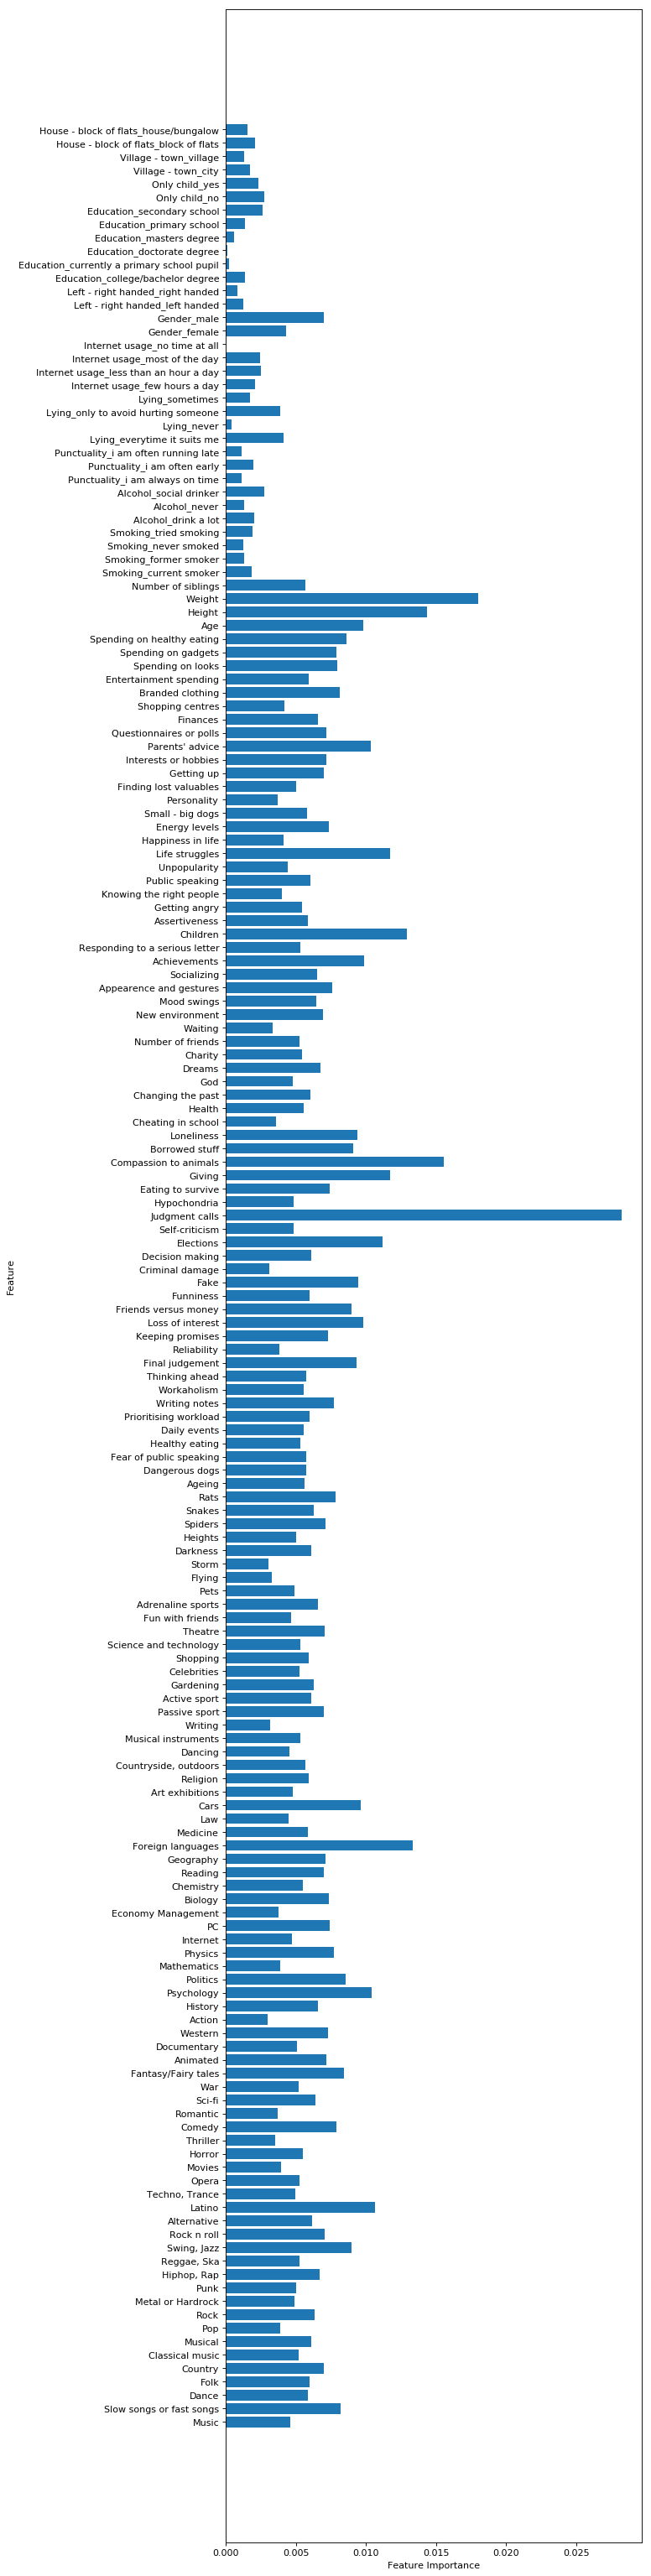

In [654]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 50), dpi=80, facecolor='w', edgecolor='k')
n_features = X.shape[1]
plt.barh(range(n_features), clfrf3.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### 4.1. Feature Selection for RF

Let's see if we can eliminate some irrelevant features just like what we did with SVM. 

In [655]:
from sklearn.feature_selection import SelectFromModel
clfrf4 = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=10), threshold='median')

In [656]:
clfrf4.fit(X_train, y_train)
X_test_s2 =clfrf4.transform(X_test)
X_train_s2 = clfrf4.transform(X_train)

In [657]:
np.shape(X_train_s2)

(808, 86)

Feature selection has removed half of the features. Let's inspect the accuracy using reduced number of features.

In [658]:
clfrf5 = RandomForestClassifier(n_estimators=100,max_depth=30,n_jobs=2)
clfrf5.fit(X_train_s2,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [659]:
print(clfrf5.score(X_train_s2, y_train))
scores=cross_val_score(clfrf5, X_train_s2,y_train, cv=10)
print(scores.mean())

1.0
0.7253067600120444


In [660]:
from sklearn.externals import joblib
joblib.dump(clfrf5, 'RF(86)_joblib')

['RF(86)_joblib']

In [661]:
import pickle
with open('trainRF(86).data', 'wb') as f:
    pickle.dump([X_train_s2, y_train], f)

In [662]:
import pickle
with open('testRF(86).data', 'wb') as f:
    pickle.dump([X_test_s2, y_test], f)

Feature selection has increased accuracy of 10-fold CV from 70.54% to 72.64%. Now we can check accuracy of test data using best models (with/out feature selection).

In [663]:
print(clfrf3.score(X_test, y_test))
print(clfrf5.score(X_test_s2, y_test))

0.698019801980198
0.7475247524752475
